## Business Understanding

### QUESTION
What are the average Salaries and JobSatisfactions by Methodology?

### Reason
The reason behind this question is simply to see if the used methodology is changing the job satisfaction and the salary of the participants of the survery. This can be a very usefull insight considering how many methodologies are available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import create_mixed_plot

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data understanding

**1.** Looking at the data

In [2]:
"The dataframe contains {} rows and {} columns.".format(df.shape[0], df.shape[1])

'The dataframe contains 51392 rows and 154 columns.'

**2.** Selected only necessary columns

In [3]:
methodology_df = df[['Methodology', 'JobSatisfaction', 'Salary']]

**3.** Check how many NaN-values are avialable for Methodology-column

In [4]:
nulls = methodology_df[methodology_df['Methodology'].isnull()]
len(nulls)

25621

## Data Preperation

**4.** Drop the NaN-values of all columns and reset the index

In [5]:
methodology_df = methodology_df.dropna().reset_index()

**5.** split the Methodology-column by ';' and stack its values

In [6]:
s = methodology_df['Methodology'].str.split('; ').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'Methodology' # needs a name to join
del methodology_df['Methodology']
joined_df = methodology_df.join(s)

**6.** show the joined dataframe

In [7]:
joined_df

,index,JobSatisfaction,Salary,Methodology
0,2,9.0,113750.000000,Agile
0,2,9.0,113750.000000,Lean
0,2,9.0,113750.000000,Scrum
0,2,9.0,113750.000000,Extreme
0,2,9.0,113750.000000,Pair
...,...,...,...,...
8136,51360,7.0,59808.612440,Scrum
8136,51360,7.0,59808.612440,Kanban
8137,51361,5.0,440.463955,Pair
8137,51361,5.0,440.463955,Evidence-based SWE


## Data modeling

**7.** Show the average JobSatisfaction and sort it by descending value

In [8]:
joined_df.groupby('Methodology')['JobSatisfaction'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,Methodology,mean
5,Lean,7.158609
8,Pair,7.109391
6,Mob,7.073314
4,Kanban,7.069726
1,Domain-driven design,7.051071
9,Scrum,7.045232
3,Extreme,7.028427
0,Agile,7.022287
7,PRINCE2,6.936170
2,Evidence-based SWE,6.925424


**7.** Show the average Salary and sort it by descending value

In [9]:
joined_df.groupby('Methodology')['Salary'].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,Methodology,mean
5,Lean,67218.587841
4,Kanban,63319.803999
1,Domain-driven design,62053.070502
7,PRINCE2,62002.463953
10,Waterfall,61247.370035
8,Pair,61149.873530
3,Extreme,60874.600812
0,Agile,60246.384735
9,Scrum,60200.506946
2,Evidence-based SWE,53780.813302


## Results evaluation

**9.** Showing a chart with the salaries as primary-y-axis and the job satisfaction as secondary-y-axis. The x-axis is filled with the methodologies in alphabetical order.

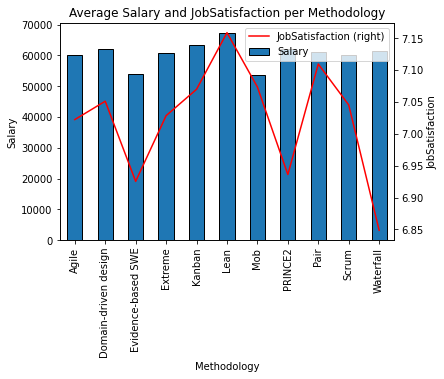

In [10]:
plt = create_mixed_plot(dataframe=joined_df, groupby=['Methodology'],  primary_measure='Salary', \
                        secondary_measure='JobSatisfaction', title='Average Salary and JobSatisfaction per Methodology')
plt.show()

### Answer:
As seen above, the job-satisfaction changes by the used methodology.
The highest job-satisaction (at **~7.16**) is for the lean methodology.
The lowest job-satisfaction (at **~6.85**) is for the waterfall methodology.
The highest salaray is also represented by the lean methodology with **~67,218.59**, 
while the mob methodology has lowest salary with **~53,681.25**.